# Name - Atharva Aloni
# Batch - 4
# Roll - C2 - 36

# Air Quality Index Prediction using Open Weather API 

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('city_day.csv')

In [4]:
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [5]:
df.drop(columns=['City','Date','Benzene'	,'Toluene',	'Xylene'],axis=1,inplace=True)

In [6]:
df

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,AQI,AQI_Bucket
0,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,NaN,NaN
1,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,NaN,NaN
2,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,NaN,NaN
3,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,NaN,NaN
4,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
29526,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,41.0,Good
29527,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,70.0,Satisfactory
29528,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,68.0,Satisfactory
29529,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,54.0,Satisfactory


In [8]:
df.drop(columns=['AQI_Bucket'],axis=1,inplace=True)

In [9]:
df

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,AQI
0,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,NaN
1,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,NaN
2,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,NaN
3,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,NaN
4,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,NaN
...,...,...,...,...,...,...,...,...,...,...
29526,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,41.0
29527,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,70.0
29528,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,68.0
29529,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,54.0


In [10]:
df.drop(columns=['NOx'],inplace=True)

In [11]:
df

,PM2.5,PM10,NO,NO2,NH3,CO,SO2,O3,AQI
0,NaN,NaN,0.92,18.22,NaN,0.92,27.64,133.36,NaN
1,NaN,NaN,0.97,15.69,NaN,0.97,24.55,34.06,NaN
2,NaN,NaN,17.40,19.30,NaN,17.40,29.07,30.70,NaN
3,NaN,NaN,1.70,18.48,NaN,1.70,18.59,36.08,NaN
4,NaN,NaN,22.10,21.42,NaN,22.10,39.33,39.31,NaN
...,...,...,...,...,...,...,...,...,...
29526,15.02,50.94,7.68,25.06,12.47,0.47,8.55,23.30,41.0
29527,24.38,74.09,3.42,26.06,11.99,0.52,12.72,30.14,70.0
29528,22.91,65.73,3.45,29.53,10.71,0.48,8.42,30.96,68.0
29529,16.64,49.97,4.05,29.26,10.03,0.52,9.84,28.30,54.0


In [12]:
df.isna().sum()

PM2.5     4598
PM10     11140
NO        3582
NO2       3585
NH3      10328
CO        2059
SO2       3854
O3        4022
AQI       4681
dtype: int64

In [ ]:
df['PM2.5'] = df['PM2.5'].fillna(df['PM2.5'].median())

In [14]:
df['AQI'] = df['AQI'].fillna(df['AQI'].median())
df['CO'] = df['CO'].fillna(df['CO'].median())
df['NH3'] = df['NH3'].fillna(df['NH3'].median())
df['NO'] = df['NO'].fillna(df['NO'].median())
df['NO2'] = df['NO2'].fillna(df['NO2'].median())
df['O3'] = df['O3'].fillna(df['O3'].median())
df['PM10'] = df['PM10'].fillna(df['PM10'].median())
df['SO2'] = df['SO2'].fillna(df['SO2'].median())

In [15]:
df.isna().sum()

PM2.5    0
PM10     0
NO       0
NO2      0
NH3      0
CO       0
SO2      0
O3       0
AQI      0
dtype: int64

In [16]:
corr = df.corr()

<Axes: >

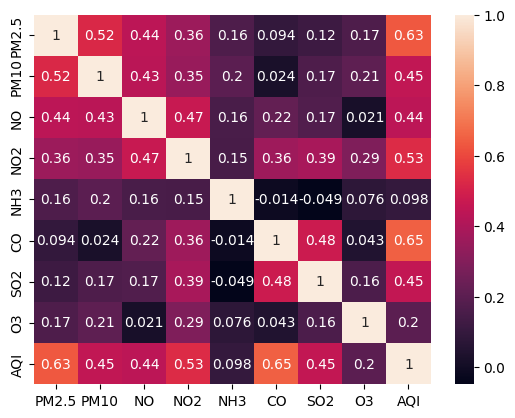

In [18]:
sb.heatmap(corr,annot=True)

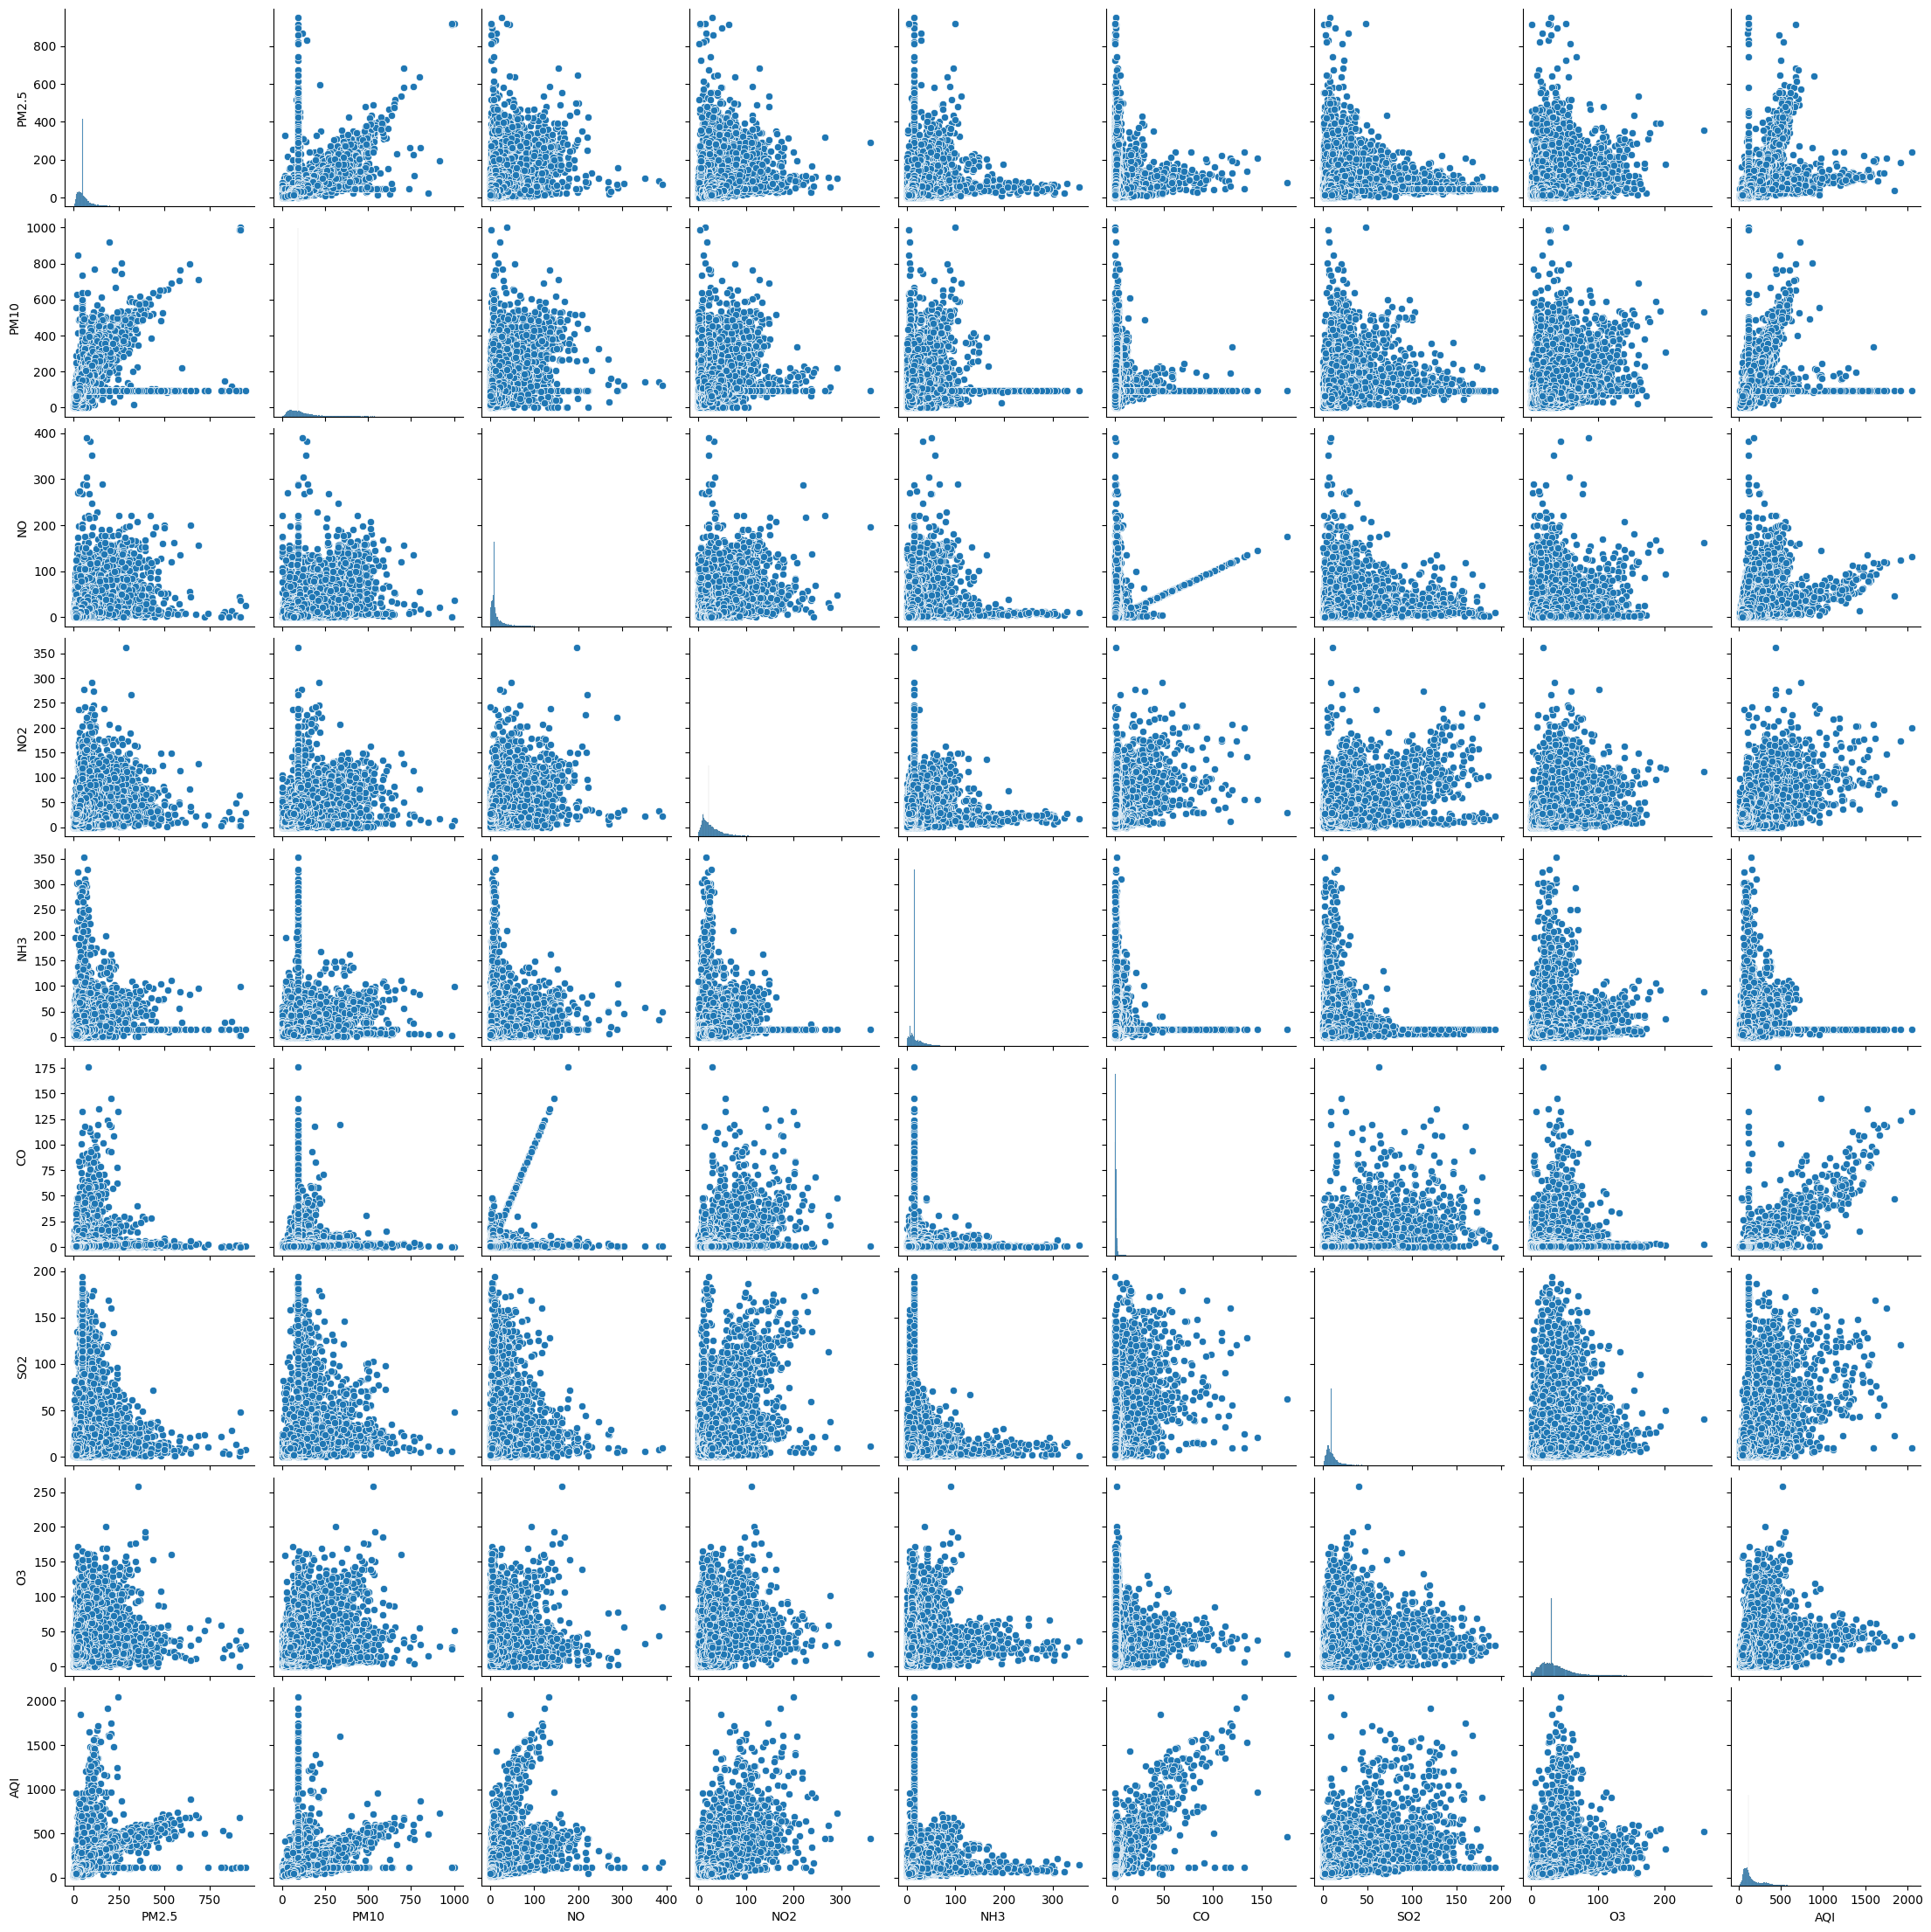

In [ ]:
sb.pairplot(data=df)

In [20]:
x = df.drop(columns=['AQI'],axis=1).values
y = df['AQI'].values

In [21]:
x

array([[ 48.57,  95.68,   0.92, ...,   0.92,  27.64, 133.36],
       [ 48.57,  95.68,   0.97, ...,   0.97,  24.55,  34.06],
       [ 48.57,  95.68,  17.4 , ...,  17.4 ,  29.07,  30.7 ],
       ...,
       [ 22.91,  65.73,   3.45, ...,   0.48,   8.42,  30.96],
       [ 16.64,  49.97,   4.05, ...,   0.52,   9.84,  28.3 ],
       [ 15.  ,  66.  ,   0.4 , ...,   0.59,   2.1 ,  17.05]],
      shape=(29531, 8))

In [22]:
y

array([118., 118., 118., ...,  68.,  54.,  50.], shape=(29531,))

In [23]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.4,random_state=42)

In [25]:
x_train.shape

(17718, 8)

In [26]:
x_test.shape

(11813, 8)

In [27]:
model_XGBR = XGBRegressor()

In [28]:
model_XGBR.fit(x_train,y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [29]:
y_pred = model_XGBR.predict(x_test)

In [30]:
y_pred

array([117.50746 , 117.50746 , 118.55333 , ..., 110.948715,  47.064667,
        59.101715], shape=(11813,), dtype=float32)

In [32]:
XGBR_mse = mean_squared_error(y_test,y_pred)

In [33]:
XGBR_mae = mean_absolute_error(y_test,y_pred)

In [34]:
r2_score_XGBR = r2_score(y_test,y_pred)

In [35]:
print("r2 score XGBR : ",r2_score_XGBR*100)
print("Mean sqaure error XGBR : ",XGBR_mse*100)
print("Mean absolute error XGBR : ",XGBR_mae*100)


r2 score XGBR :  86.38173490245539
Mean sqaure error XGBR :  215981.24563488824
Mean absolute error XGBR :  2201.1370108854776


In [36]:
random_model = RandomForestRegressor()

In [37]:
random_model.fit(x_train,y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [38]:
y_pred_random = random_model.predict(x_test)

In [39]:
random_mse = mean_squared_error(y_test,y_pred_random)

In [40]:
random_mae = mean_absolute_error(y_test,y_pred_random)

In [41]:
r2_score_random = r2_score(y_test,y_pred_random)

In [42]:
print("r2 score random forest Model : ",r2_score_random*100)
print("Mean sqaure error Random Forest Model : ",random_mse*100)
print("Mean absolute error Random Forest Model : ",random_mae*100)


r2 score random forest Model :  87.5686334691162
Mean sqaure error Random Forest Model :  197157.42123188957
Mean absolute error Random Forest Model :  2085.3578914355235


In [ ]:
import requests

def get_lat_lon(city_name, api_key):
    geo_url = f"http://api.openweathermap.org/geo/1.0/direct?q={city_name}&limit=1&appid={api_key}"
    response = requests.get(geo_url)
    data = response.json()
    if not data:
        raise ValueError("City not found")
    return data[0]['lat'], data[0]['lon']

def get_pollution_data(lat, lon, api_key):
    air_url = f"http://api.openweathermap.org/data/2.5/air_pollution?lat={lat}&lon={lon}&appid={api_key}"
    response = requests.get(air_url)
    data = response.json()
    components = data['list'][0]['components']
    aqi_index = data['list'][0]['main']['aqi']
    return components, aqi_index

def fetch_air_quality(city_name, api_key):
    try:
        lat, lon = get_lat_lon(city_name, api_key)
        components, aqi = get_pollution_data(lat, lon, api_key)

        features = {
            'City': city_name,
            'PM2.5': components.get('pm2_5'),
            'PM10': components.get('pm10'),
            'NO': components.get('no'),
            'NO2': components.get('no2'),
            'NH3': components.get('nh3'),
            'CO': components.get('co'),
            'SO2': components.get('so2'),
            'O3': components.get('o3'),
            'AQI': aqi
        }

        return features

    except Exception as e:
        return {"error": str(e)}


if __name__ == "__main__":
    api_key = "6fdf3c6680b0dc5b17cd7c486c39d4ce"  
    city = input("Enter city name: ")
    data = fetch_air_quality(city, api_key)
    
    if "error" in data:
        print("Error:", data["error"])
    else:
        # Drop 'City' and 'AQI' fields
        numeric_features = [value for key, value in data.items() if key not in ['City', 'AQI']]
        
        print("\n📊 1D Feature Array (excluding City & AQI):")
        print(numeric_features)



📊 1D Feature Array (excluding City & AQI):
[3.2, 3.79, 0.22, 2.24, 6.38, 103.35, 1.02, 38.21]


In [48]:
numeric_features = np.array(numeric_features)

In [49]:
y_out = random_model.predict(numeric_features.reshape(1,-1))

In [50]:
y_out

array([182.35])

In [51]:
def get_aqi_category(aqi):
    if aqi <= 50:
        return "Good"
    elif aqi <= 100:
        return "Satisfactory"
    elif aqi <= 200:
        return "Moderate"
    elif aqi <= 300:
        return "Poor"
    elif aqi <= 400:
        return "Very Poor"
    elif aqi <= 500:
        return "Severe"
    else:
        return "Out of Range"

In [52]:
print(city," AQI : ",y_out)
ans = get_aqi_category(y_out)
print("AQI range : ",ans)

nagpur  AQI :  [182.35]
AQI range :  Moderate
